<a href="https://colab.research.google.com/github/Nusnan-AM/Research_models/blob/main/Decision_Tree_Jar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DECISION TREE

# Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn  # Import sklearn after installing the specific version
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load the Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 20180501_174635.jpg
 20180501_174733.jpg
 20180501_174736.jpg
 application-aptitude-2020.pdf
 catboost_info
'Colab Notebooks'
 colour_random_jar_model.pkl
'Contact '
'Contact Information.gform'
'Copy of randomforest.ipynb'
'CST20083  AM.NUSNAN.mp4'
'CST382-3_1_Introduction (1).gslides'
'CST382-3_2_Sampling and Quantization.gslides'
'CST WAD  Group - C.gdoc'
'Design Documentation on Boarding Project.gdoc'
'Document from Serial Ghost'
 DSC_0004.JPG
 DSC_0087.JPG
 DSC_0089.JPG
 DSC_0096.JPG
 DSC_0100.JPG
 DSC_0105.JPG
 DSC_0106.JPG
 DSC_0107.JPG
 DSC_0109.JPG
 DSC_0110_1.JPG
 DSC_0111_1.JPG
 DSC_0113.JPG
 DSC_0114_1.JPG
 DSC_0114.JPG
 DSC_0115.JPG
 DSC_0116_1.JPG
 DSC_0117.JPG
 DSC_0119.JPG
 DSC_0124.JPG
 DSC_0125_1.JPG
 DSC_0127.JPG
 DSC_0128.JPG
 DSC_0129.JPG
 DSC_0130.JPG
 DSC_0131.JPG
 DSC_0140.JPG
 DSC_0143_1.JPG
 DSC_0146_1.JPG
 DSC_0147_1.JPG
 DSC_0148_1.JPG
 DSC_0148_2.JPG
 DSC_0149_1.JPG
 DSC_0150_1.JPG
 DSC_0152_1.JPG
 DSC_0154.JPG
 DSC_0156.JPG
 DSC_

In [ ]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
data = pd.read_csv("jartest.csv")

In [ ]:
X_turbidity = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4','ACD']]
X_ph = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4','ACD']]
X_colour = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4','ACD']]
y_turbidity = data['Turbidity']  # Target: Turbidity
y_ph = data['PH']  # Target: PH
y_colour = data['Colour']

# Model development

## Turbidiy


In [ ]:
X_turbidity_train, X_turbidity_test, y_turbidity_train, y_turbidity_test = train_test_split(X_turbidity, y_turbidity, test_size=0.2, random_state=42)

In [ ]:
model_turbidity = DecisionTreeRegressor(random_state=42, criterion='squared_error', max_depth=3, min_samples_split=2, min_samples_leaf=1)

In [ ]:
model_turbidity.fit(X_turbidity_train, y_turbidity_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

## PH

In [ ]:
X_ph_train, X_ph_test, y_ph_train, y_ph_test = train_test_split(X_ph, y_ph, test_size=0.2, random_state=42)

In [ ]:
model_ph = DecisionTreeRegressor(random_state=42, criterion='squared_error', max_depth=3, min_samples_split=2, min_samples_leaf=1)

In [ ]:
model_ph.fit(X_ph_train, y_ph_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

## Colour

In [ ]:
X_colour_train, X_colour_test, y_colour_train, y_colour_test = train_test_split(X_colour, y_colour, test_size=0.2, random_state=42)

In [ ]:
model_colour =  DecisionTreeRegressor(random_state=42, criterion='squared_error', max_depth=3, min_samples_split=2, min_samples_leaf=1)

In [ ]:
model_colour.fit(X_colour_train, y_colour_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

## Model Testing & Validation

In [ ]:
y_turbidity_pred = model_turbidity.predict(X_turbidity_test)
y_turbidity_pred

array([20.8574953 , 31.06089623, 20.8574953 , ..., 31.06089623,
       17.27590381,  8.41178977])

In [ ]:
results_Tur = pd.DataFrame({
    'Actual': y_turbidity_test.flatten() if hasattr(y_turbidity_test, 'flatten') else y_turbidity_test,
    'Predicted': y_turbidity_pred.flatten() if hasattr(y_turbidity_pred, 'flatten') else y_turbidity_pred
})


results_Tur

,Actual,Predicted
4139,1.90,20.857495
586,22.00,31.060896
553,16.00,20.857495
227,19.00,17.275904
1321,11.56,17.275904
...,...,...
1433,13.50,17.275904
1018,13.00,13.619580
582,42.00,31.060896
203,16.00,17.275904


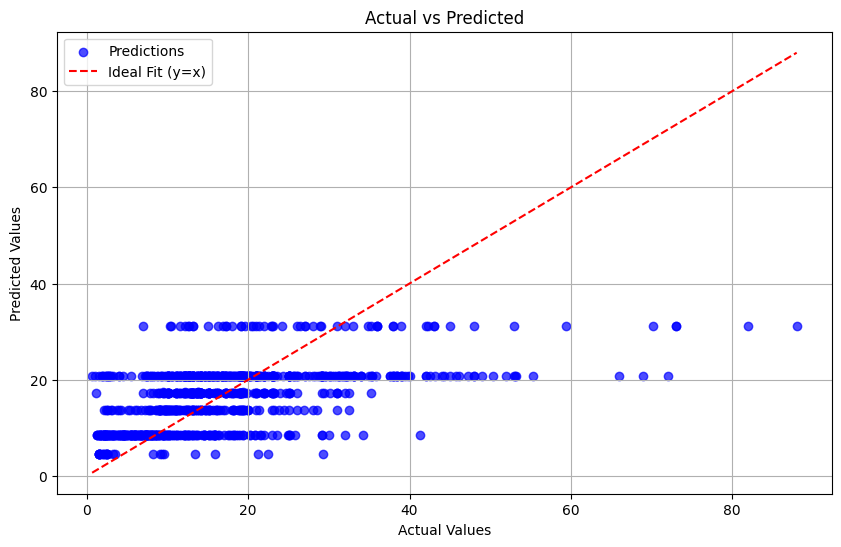

In [ ]:
### plot the actuals and predicted values


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Tur['Actual'], results_Tur['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Tur['Actual'].min(), results_Tur['Predicted'].min())
max_val = max(results_Tur['Actual'].max(), results_Tur['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [ ]:
y_ph_pred = model_ph.predict(X_ph_test)
y_ph_pred

array([7.44224583, 7.05448363, 6.9030803 , ..., 7.05448363, 7.05448363,
       7.44224583])

In [ ]:
results_Ph = pd.DataFrame({
    'Actual': y_ph_test.flatten() if hasattr(y_ph_test, 'flatten') else y_ph_test,
    'Predicted': y_ph_pred.flatten() if hasattr(y_ph_pred, 'flatten') else y_ph_pred
})

results_Ph

,Actual,Predicted
4139,7.43,7.442246
586,6.92,7.054484
553,6.82,6.903080
227,7.00,6.903080
1321,6.85,6.903080
...,...,...
1433,6.91,6.903080
1018,6.67,6.903080
582,6.82,7.054484
203,7.13,7.054484


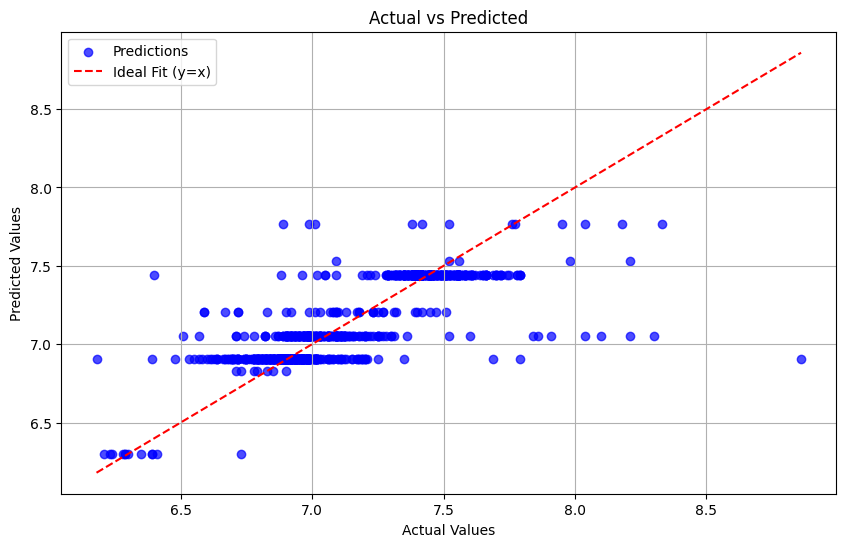

In [ ]:
### plot the actuals and predicted values


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Ph['Actual'], results_Ph['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Ph['Actual'].min(), results_Ph['Predicted'].min())
max_val = max(results_Ph['Actual'].max(), results_Ph['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [ ]:
y_colour_pred = model_colour.predict(X_colour_test)
y_colour_pred

array([42.7523584, 42.7523584, 42.7523584, ..., 42.7523584, 42.7523584,
       42.7523584])

In [ ]:
results_Colo = pd.DataFrame({
    'Actual': y_colour_test.flatten() if hasattr(y_colour_test, 'flatten') else y_colour_test,
    'Predicted': y_colour_pred.flatten() if hasattr(y_colour_pred, 'flatten') else y_colour_pred
})


results_Colo

,Actual,Predicted
4139,10.0,42.752358
586,17.0,42.752358
553,19.0,42.752358
227,20.0,42.752358
1321,26.0,42.752358
...,...,...
1433,28.0,42.752358
1018,33.0,42.752358
582,25.0,42.752358
203,130.0,42.752358


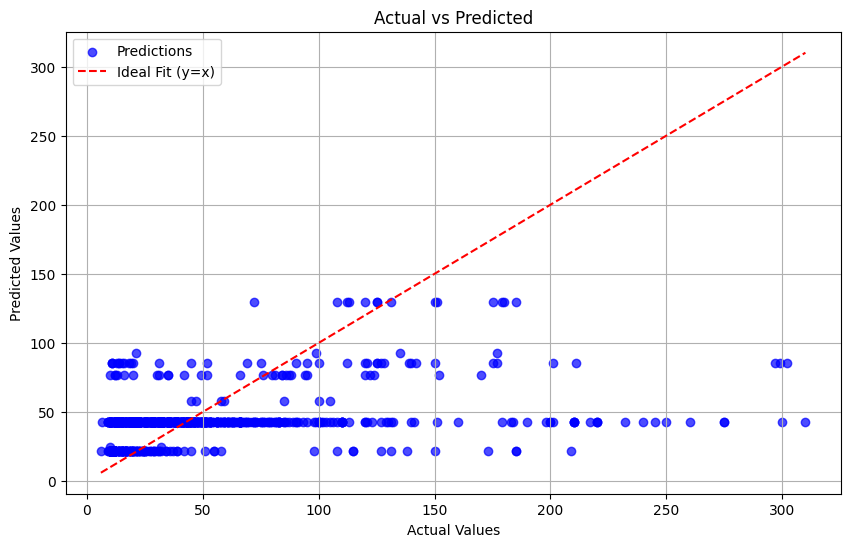

In [ ]:
### plot the actuals and predicted values


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Colo['Actual'], results_Colo['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Colo['Actual'].min(), results_Colo['Predicted'].min())
max_val = max(results_Colo['Actual'].max(), results_Colo['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()




In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_test, y_pred, target_name):
    r2 = r2_score(y_test, y_pred)
    accuracy = r2 * 100  # Convert R² to percentage for accuracy
    print(f"\nEvaluation Metrics for {target_name}:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R-squared (R²): {r2:.2f}")
    print(f"Accuracy: {accuracy:.2f}%")  # Display accuracy as a percentage

evaluate_model(y_turbidity_test, y_turbidity_pred, "Turbidity")
evaluate_model(y_ph_test, y_ph_pred, "PH")
evaluate_model(y_colour_test, y_colour_pred, "Colour")



Evaluation Metrics for Turbidity:
Mean Absolute Error (MAE): 6.79
Mean Squared Error (MSE): 91.15
R-squared (R²): 0.28
Accuracy: 27.86%

Evaluation Metrics for PH:
Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.03
R-squared (R²): 0.66
Accuracy: 65.53%

Evaluation Metrics for Colour:
Mean Absolute Error (MAE): 25.43
Mean Squared Error (MSE): 1860.96
R-squared (R²): 0.14
Accuracy: 14.38%


# Validation

In [ ]:
def predict_from_input():
    print("Enter the following feature values:")
    raw_turbidity = float(input("Raw Turbidity: "))
    raw_ph = float(input("Raw PH: "))
    raw_colour = float(input("Raw Colour: "))
    pac = float(input("PAC: "))
    kmno4 = float(input("KMnO4: "))
    acd = float(input("ACD: "))

    # Combine inputs into a DataFrame
    input_data = pd.DataFrame({
        'Raw_Turbidity': [raw_turbidity],
        'Raw_PH': [raw_ph],
        'Raw_Colour': [raw_colour],
        'PAC': [pac],
        'KMnO4': [kmno4],
        'ACD': [acd]
    })

    # Make predictions
    turbidity_pred = model_turbidity.predict(input_data)
    ph_pred = model_ph.predict(input_data)
    colour_pred = model_colour.predict(input_data)

    # Display predictions
    print("\nPredicted Values:")
    print(f"Turbidity: {turbidity_pred[0]:.2f}")
    print(f"PH: {ph_pred[0]:.2f}")
    print(f"Colour: {colour_pred[0]:.2f}")

# Call the function to test
predict_from_input()


# HyperParameter Tuning

## turbidity

In [ ]:
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],  # Valid criteria for regression
    'max_depth': [3, 5, 10, None],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum samples per leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Number of features considered for the best split
}


In [ ]:
!pip install scikit-learn==1.2.0

In [ ]:
model = DecisionTreeRegressor(random_state=42)
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  # Metric for evaluation
    cv=3,  # 3-fold cross-validation
    verbose=1,  # Print progress
    n_jobs=-1  # Use all available processors
)

# Perform GridSearchCV to find the best hyperparameters
grid_search.fit(X_turbidity_train, y_turbidity_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)  # Convert to positive MSE


Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best Parameters: {'criterion': 'squared_error', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan 

## **ph**

In [ ]:
grid_search.fit(X_ph_train, y_ph_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best Parameters: {'criterion': 'squared_error', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan 

## Colour

In [ ]:
grid_search.fit(X_colour_train, y_colour_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best Parameters: {'criterion': 'squared_error', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan 